Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
weather_data = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\Weather Data.csv")

In [3]:
weather_data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
weather_data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

Data Cleaning and Preprocessing

In [5]:
weather_data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
weather_data['Temp_C'] = pd.to_numeric(weather_data['Temp_C'], errors='coerce')
weather_data['Dew Point Temp_C'] = pd.to_numeric(weather_data['Dew Point Temp_C'], errors='coerce')
weather_data['Rel Hum_%'] = pd.to_numeric(weather_data['Rel Hum_%'], errors='coerce')
weather_data['Wind Speed_km/h'] = pd.to_numeric(weather_data['Wind Speed_km/h'], errors='coerce')
weather_data['Visibility_km'] = pd.to_numeric(weather_data['Visibility_km'], errors='coerce')
weather_data['Press_kPa'] = pd.to_numeric(weather_data['Press_kPa'], errors='coerce')

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


EDA

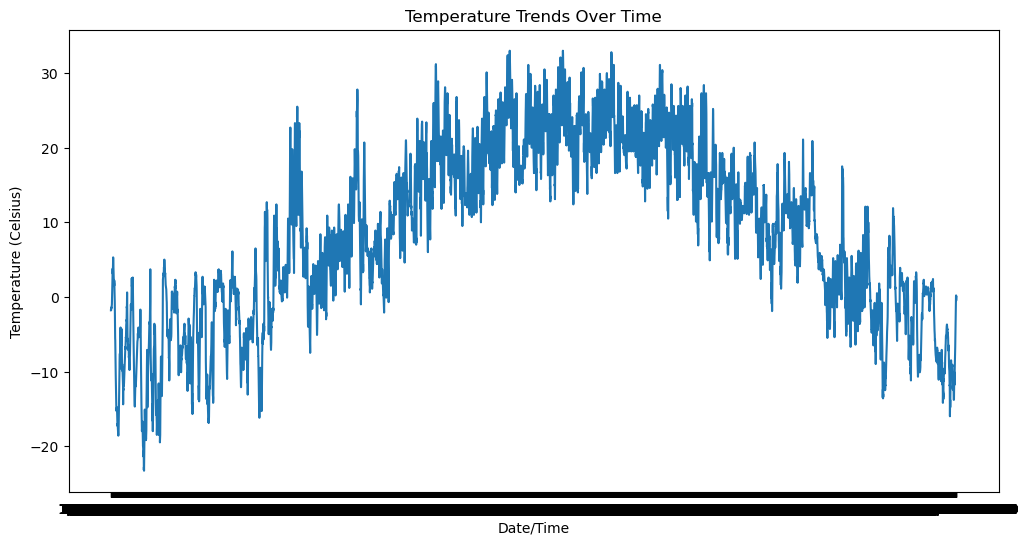

In [8]:
# Temperature Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Temp_C', data=weather_data)
plt.title('Temperature Trends Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (Celsius)')
plt.show()

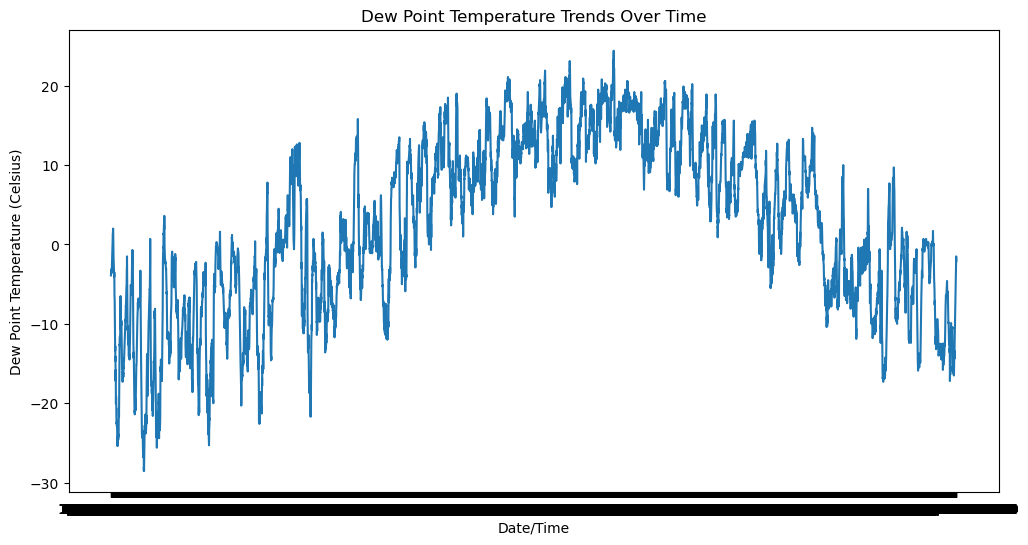

In [9]:
# Dew Point Temperature Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Dew Point Temp_C', data=weather_data)
plt.title('Dew Point Temperature Trends Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Dew Point Temperature (Celsius)')
plt.show()

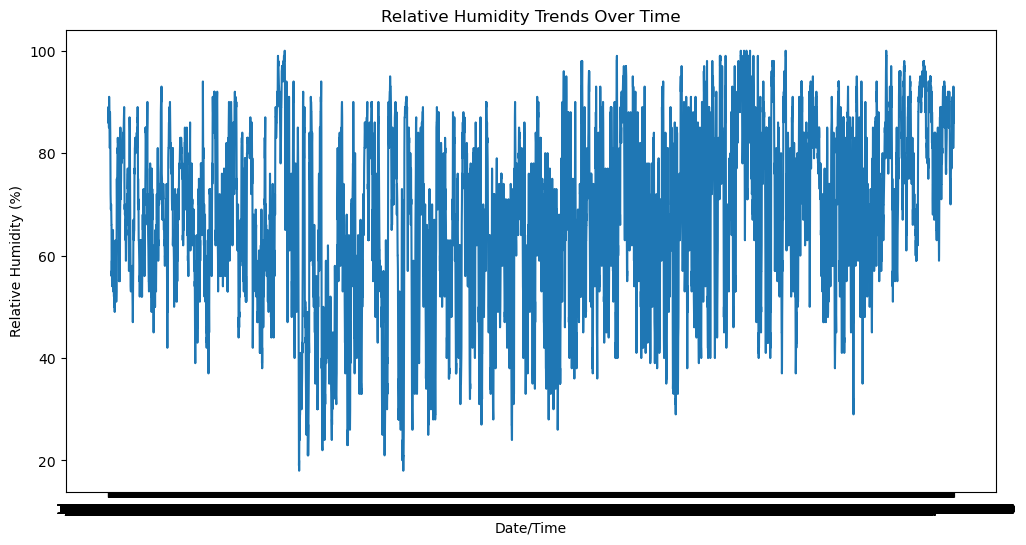

In [10]:
# Relative Humidity Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Rel Hum_%', data=weather_data)
plt.title('Relative Humidity Trends Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Relative Humidity (%)')
plt.show()

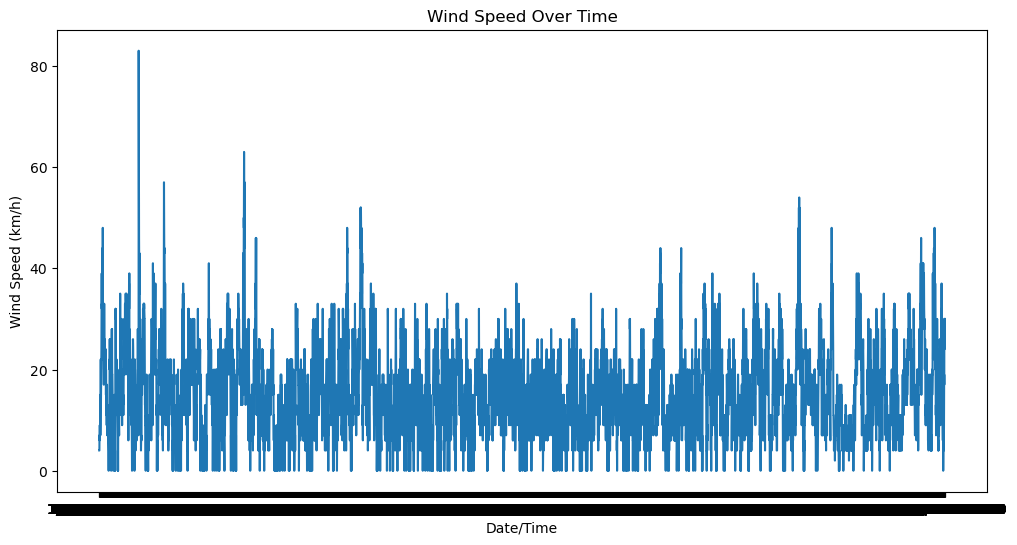

In [11]:
# Wind Speed Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Wind Speed_km/h', data=weather_data)
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.show()

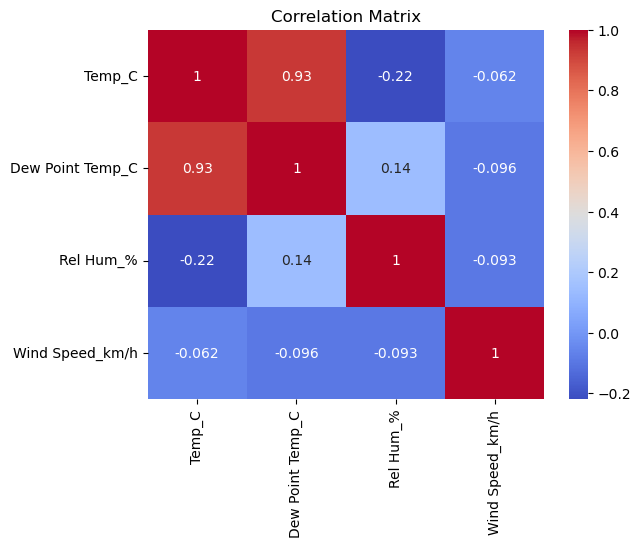

In [12]:
# Correlation Analysis
correlation_matrix = weather_data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
# Selecting relevant features (X) and target variable (y)
X = weather_data[['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]
y = weather_data['Temp_C']

In [15]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Creating a linear regression model
model = LinearRegression()

In [17]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6874138072124182


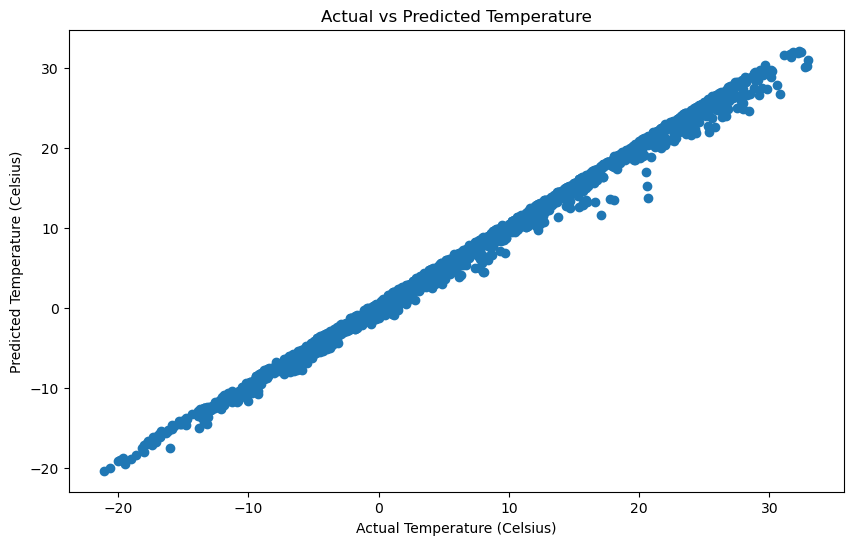

In [20]:
 #Visualizing actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature (Celsius)')
plt.ylabel('Predicted Temperature (Celsius)')
plt.title('Actual vs Predicted Temperature')
plt.show()